This is the template for the image recognition exercise. <Br>
Some **general instructions**, read these carefully:
 - The final assignment is returned as a clear and understandable *report*
    - define shortly the concepts and explain the phases you use
    - use the Markdown feature of the notebook for larger explanations
 - return your output as a *working* Jupyter notebook
 - name your file as Exercise_MLPR2023_Partx_uuid.jpynb
    - use the uuid code determined below
    - use this same code for each part of the assignment
 - write easily readable code with comments     
     - if you exploit code from web, provide a reference
 - it is ok to discuss with a friend about the assignment. But it is not ok to copy someone's work. Everyone should submit their own implementation
     - in case of identical submissions, both submissions are failed 

**Deadlines:**
- Part 1: Mon 6.2 at 23:59**
- Part 2: Mon 20.2 at 23:59**
- Part 3: Mon 6.3 at 23:59**

**No extensions for the deadlines** <br>
- after each deadline, example results are given, and it is not possible to submit anymore

**If you encounter problems, Google first and if you can’t find an answer, ask for help**
- Moodle area for questions
- pekavir@utu.fi
- teacher available for questions
    - Monday 30.1 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Monday 13.2 at 14:00-15:00 room 407B Honka (Agora 4th floor)
    - Thursday 2.3 at lecture 10:15-12:00 

**Grading**

The exercise covers a part of the grading in this course. The course exam has 5 questions, 6 points of each. Exercise gives 6 points, i.e. the total score is 36 points.

From the template below, you can see how many exercise points can be acquired from each task. Exam points are given according to the table below: <br>
<br>
7 exercise points: 1 exam point <br>
8 exercise points: 2 exam points <br>
9 exercise points: 3 exam points <br>
10 exercise points: 4 exam points <br>
11 exercise points: 5 exam points <br>
12 exercise points: 6 exam points <br>
<br>
To pass the exercise, you need at least 7 exercise points, and at least 1 exercise point from each Part.
    
Each student will grade one submission from a peer and their own submission. After each Part deadline, example results are given. Study them carefully and perform the grading according to the given instructions. Mean value from the peer grading and self-grading is used for the final points. 

In [3]:
import uuid
# Run this cell only once and save the code. Use the same id code for each Part.
# Printing random id using uuid1()
print ("The id code is: ",end="")
print ("52875c60-a63d-11ed-874c-00155d8198c4")

The id code is: 52875c60-a63d-11ed-874c-00155d8198c4


# Part 1

Read the original research article:

İ. Çınar and M. Koklu. Identification of rice varieties using machine learning algorithms. Journal of Agricultural Sciences, 28(2):307–325, 2022. doi: 10.15832/ankutbd.862482.

https://dergipark.org.tr/en/download/article-file/1513632

## Introduction

Will be written in Part 3

## Preparations of the data (1 p)

Make three folders in your working folder: "notebooks", "data" and "training_data". Save this notebook in "notebooks" folder.
<br> <br>
Perform preparations for the data
- import all the packages needed for this notebook in one cell
- import the images. Data can be found from (downloading starts as you press the link) https://www.muratkoklu.com/datasets/vtdhnd09.php <br>
    - save the data folders "Arborio", "Basmati" and "Jasmine" in "data" folder
- take a random sample of 100 images from Arborio, Basmati and Jasmine rice species (i.e. 300 images in total)
- determine the contour of each rice (you can use e.g. *findContours* from OpenCV)
- plot one example image of each rice species, including the contour

## Feature extraction (2 p)

Gather the feature data <br>
<br>
Color features (15) <br>
- Calculate the following color features for each image, including only the pixels within the contour (you can use e.g. *pointPolygonTest* from OpenCV)
    - Mean for each RGB color channel
    - Variance for each RGB color channel
    - Skewness for each RGB color channel
    - Kurtosis for each RGB color channel
    - Entropy for each RGB color channel
    
Dimension features (6) <br>
- Fit an ellipse to the contour points (you can use e.g. *fitEllipse* from OpenCV)
- Plot one example image of each rice species including the fitted ellipse
- Calculate the following features for each image (for details, see the original article)
    - the major axis length the ellipse
    - the minor axis length of the ellipse
    - area inside the contour (you can use e.g. *contourArea* from OpenCV)
    - perimeter of the contour (you can use e.g. *arcLength* from OpenCV)
    - roundness
    - aspect ratio
    
Gather all the features in one array or dataframe: one data point in one row, including all feature values in columns. <br>
For each data point, include also information of the original image and the label (rice species). Save the data in "training_data" folder.

# Part 2

## Data exploration (2 p)

- Standardize the data
- Plot a boxplot of each feature
- Plot histogram of each feature, use a different color for each class
- Plot pairplot (each feature against each feature and the label against each feature)
- Discuss your findings from the above figures, e.g. can you spot features which might be very useful in predicting the correct class? 
- Fit PCA using two components
- Plot the PCA figure with two components, color the data points according to their species
- Can you see any clusters in PCA? Does this figure give you any clues, how well you will be able to classify the image types? Explain.
- How many PCA components are needed to cover 99% of the variance?
- Make clear figures, use titles and legends for clarification

## Model selection (2 p)

Select the best model for each classifier. Use 5-fold repeated cross validation with 3 repetitions (*RepeatedKFold* from sklearn). You can choose the hyperparameter ranges to use (i.e. from which values the best hyperparameters are selected if they are not stated below.) <br>

- k Nearest Neighbors classifier: hyperparameter k
- random forest: hyperparameters max_depth and max_features
- MLP: use one hidden layer and Early stopping. Hyperparameters:
    - number of neurons in the hidden layer
    - activation function: logistic sigmoid function and rectified linear unit function
    - solver: stochastic gradient descent and adam
    - validation_fraction: 0.1 and 0.5

For each classifier:
- Report the best hyperparameter or the best combination of hyperparameters. <br>
- Plot the accuracy versus the hyperparameter/hyperparameter combination and highlight the best value. <br>

For random forest model, report the feature importance for each feature. Which features seem to be the most important? Does this correspond with the observations you made in the data exploration? <br>
Ponder the model selection process. What things should be considered when selecting the model to be used?

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

In [5]:
df = pd.read_parquet("./training_data/rice_feature_data.parquet")

In [6]:
df.sample(5)

Full path            File name  \
179  ./Rice_Image_Dataset/data/Basmati/basmati (136...  basmati (13642).jpg   
267  ./Rice_Image_Dataset/data/Jasmine/Jasmine (223...   Jasmine (2234).jpg   
237  ./Rice_Image_Dataset/data/Jasmine/Jasmine (745...    Jasmine (745).jpg   
102  ./Rice_Image_Dataset/data/Basmati/basmati (921...    basmati (921).jpg   
275  ./Rice_Image_Dataset/data/Jasmine/Jasmine (864...   Jasmine (8645).jpg   

     Species      Mean B      Mean G      Mean R  Variance B  Variance G  \
179  Basmati  134.151033  123.145775  123.262199          61         206   
267  Jasmine   88.433248   84.069202   83.549500          87         251   
237  Jasmine  129.051981  121.777560  122.052962         196          28   
102  Basmati   69.073864   65.221720   64.713843          63         119   
275  Jasmine  100.635457   96.763487   96.729476          63         121   

     Variance R    Skew B  ...  kurtosis R  entropy B  entropy G  entropy R  \
179         224 -0.149951  ...   -1.940012   8.422903   8.411910   8.412010   
267         107  0.508133  ...   -1.728935   7.592171   7.580039   7.580306   
237          78 -0.268242  ...   -1.909501   8.003495   7.992447   7.992259   
102         198  0.979718  ...   -1.004723   7.743057   7.736228   7.738402   
275         114  0.078541  ...   -1.971627   7.843813   7.834180   7.833998   

     Major axis  Minor axis    Area   Perimeter  Roundness  Aspect ratio  
179   52.919254  211.194992  8364.5  461.913774   2.029888      0.250571  
267   47.896996  144.138580  5252.0  336.308657   1.713726      0.332298  
237   46.610870  145.536957  5238.5  334.776692   1.702525      0.320268  
102   48.857143  211.580536  7956.0  470.735062   2.216402      0.230915  
275   48.594952  143.019775  5257.0  330.391917   1.652384      0.339778  

[5 rows x 24 columns]

- Standardize the data

In [7]:
new_df = df.drop(axis=1, columns=["Full path", "File name", "Species"])
new_df

Mean B      Mean G      Mean R  Variance B  Variance G  Variance R  \
0    171.073122  169.146511  169.123744         104          29          21   
1    140.112694  139.624032  139.440819         236         238         208   
2    131.914162  130.175624  129.793810           3           2         193   
3    156.670089  151.250833  150.990932           2         189         151   
4    190.830962  181.473745  182.134765         244          17          36   
..          ...         ...         ...         ...         ...         ...   
295  182.904686  176.452543  176.732879          30         211         230   
296  165.716920  156.939120  155.535625         132         254         105   
297   90.278544   87.941412   87.613877           2          22         195   
298   90.589718   90.697955   85.056606         129         180           7   
299   96.272091   93.965881   84.880093         107         211         238   

       Skew B    Skew G    Skew R  kurtosis B  ...  kurtosis R  entropy B  \
0   -1.274859 -1.270166 -1.270855   -0.299094  ...   -0.306293   8.678895   
1   -0.740620 -0.735731 -0.737866   -1.354617  ...   -1.356048   8.521550   
2   -0.439269 -0.437810 -0.438495   -1.779417  ...   -1.779925   8.483660   
3   -0.856063 -0.852854 -0.853764   -1.164669  ...   -1.167115   8.592254   
4   -1.693173 -1.675339 -1.683279    1.129370  ...    1.108806   8.791834   
..        ...       ...       ...         ...  ...         ...        ...   
295 -1.629160 -1.627537 -1.626439    0.741687  ...    0.733788   8.339773   
296 -0.983075 -0.979010 -0.977827   -0.998938  ...   -1.002959   8.257241   
297  0.392509  0.393897  0.393661   -1.830650  ...   -1.829037   7.637239   
298  0.589293  0.589708  0.592177   -1.647202  ...   -1.640501   8.103759   
299  0.485809  0.486164  0.487509   -1.755496  ...   -1.752444   8.068391   

     entropy G  entropy R  Major axis  Minor axis    Area   Perimeter  \
0     8.672939   8.673165   71.342125  136.383347  7619.0  359.019333   
1     8.516929   8.517047   76.515083  125.318237  7383.5  343.521859   
2     8.481365   8.481296   73.873634  141.535248  8011.0  364.735063   
3     8.586072   8.586200   73.795395  131.958664  7649.5  354.776692   
4     8.783648   8.784545   71.851105  142.214645  7884.0  368.960459   
..         ...        ...         ...         ...     ...         ...   
295   8.331700   8.331811   45.619522  146.105453  5128.5  335.203097   
296   8.249068   8.248177   48.052860  146.128586  5346.0  336.333041   
297   7.623509   7.623124   50.699780  137.773926  5143.5  316.409162   
298   8.102618   8.099272   59.954346  201.360138  9252.5  460.492422   
299   8.065271   8.060462   58.344410  185.181335  8337.5  427.806130   

     Roundness  Aspect ratio  
0     1.346257      0.523100  
1     1.271852      0.610566  
2     1.321473      0.521945  
3     1.309385      0.559231  
4     1.374052      0.505230  
..         ...           ...  
295   1.743475      0.312237  
296   1.683838      0.328840  
297   1.548922      0.367993  
298   1.823795      0.297747  
299   1.746821      0.315066  

[300 rows x 21 columns]

In [9]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(new_df)

- Plot a boxplot of each feature

In [13]:
sns.set(rc={'figure.figsize':(15,10)})

<AxesSubplot: >

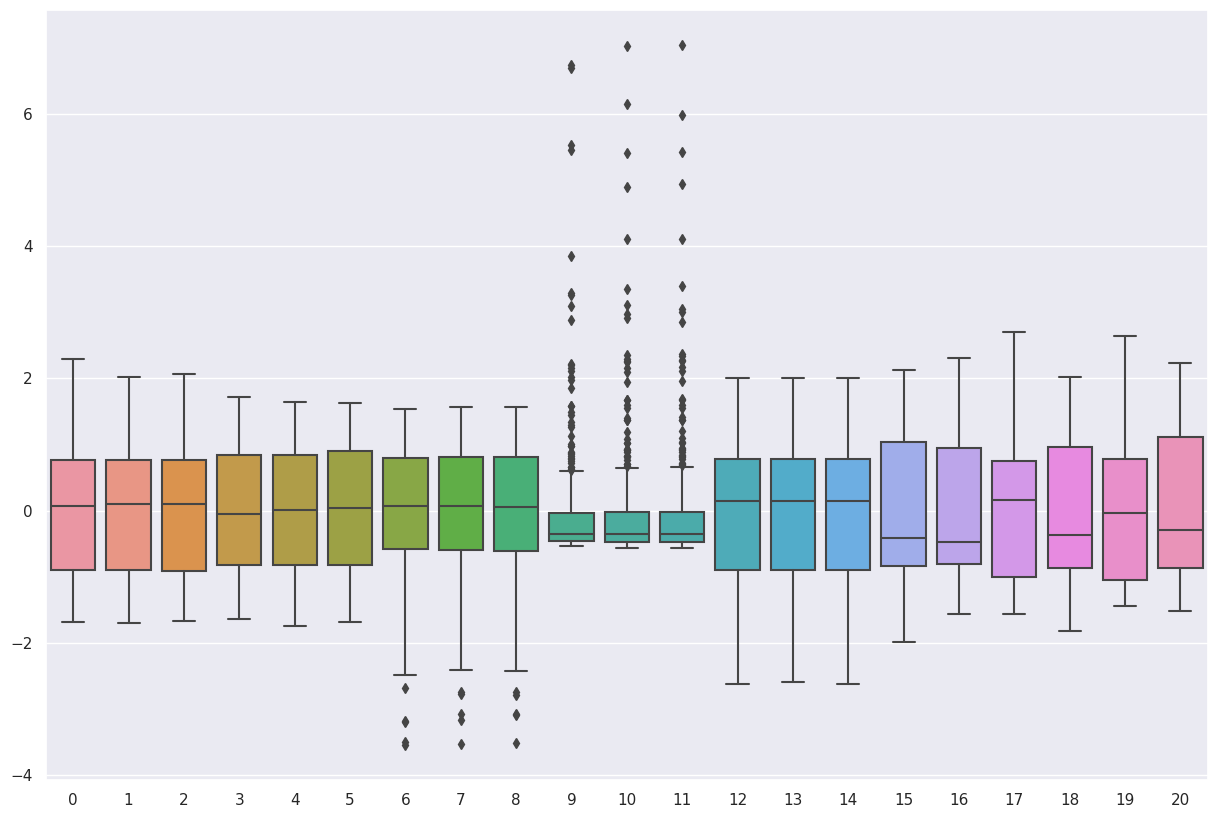

In [14]:
sns.boxplot(scaled_df)

- Plot histogram of each feature, use a different color for each class

<AxesSubplot: ylabel='Count'>

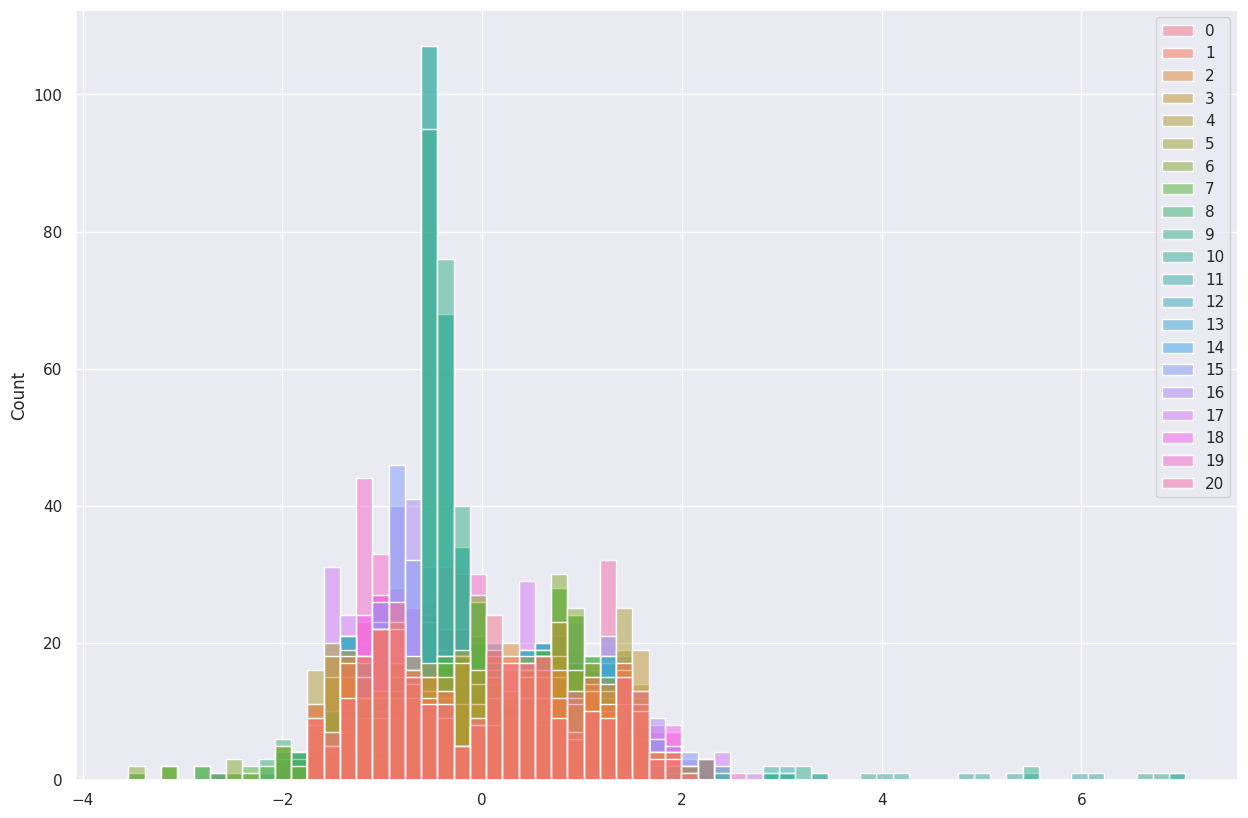

In [15]:
sns.histplot(scaled_df)

- Plot pairplot (each feature against each feature and the label against each feature)

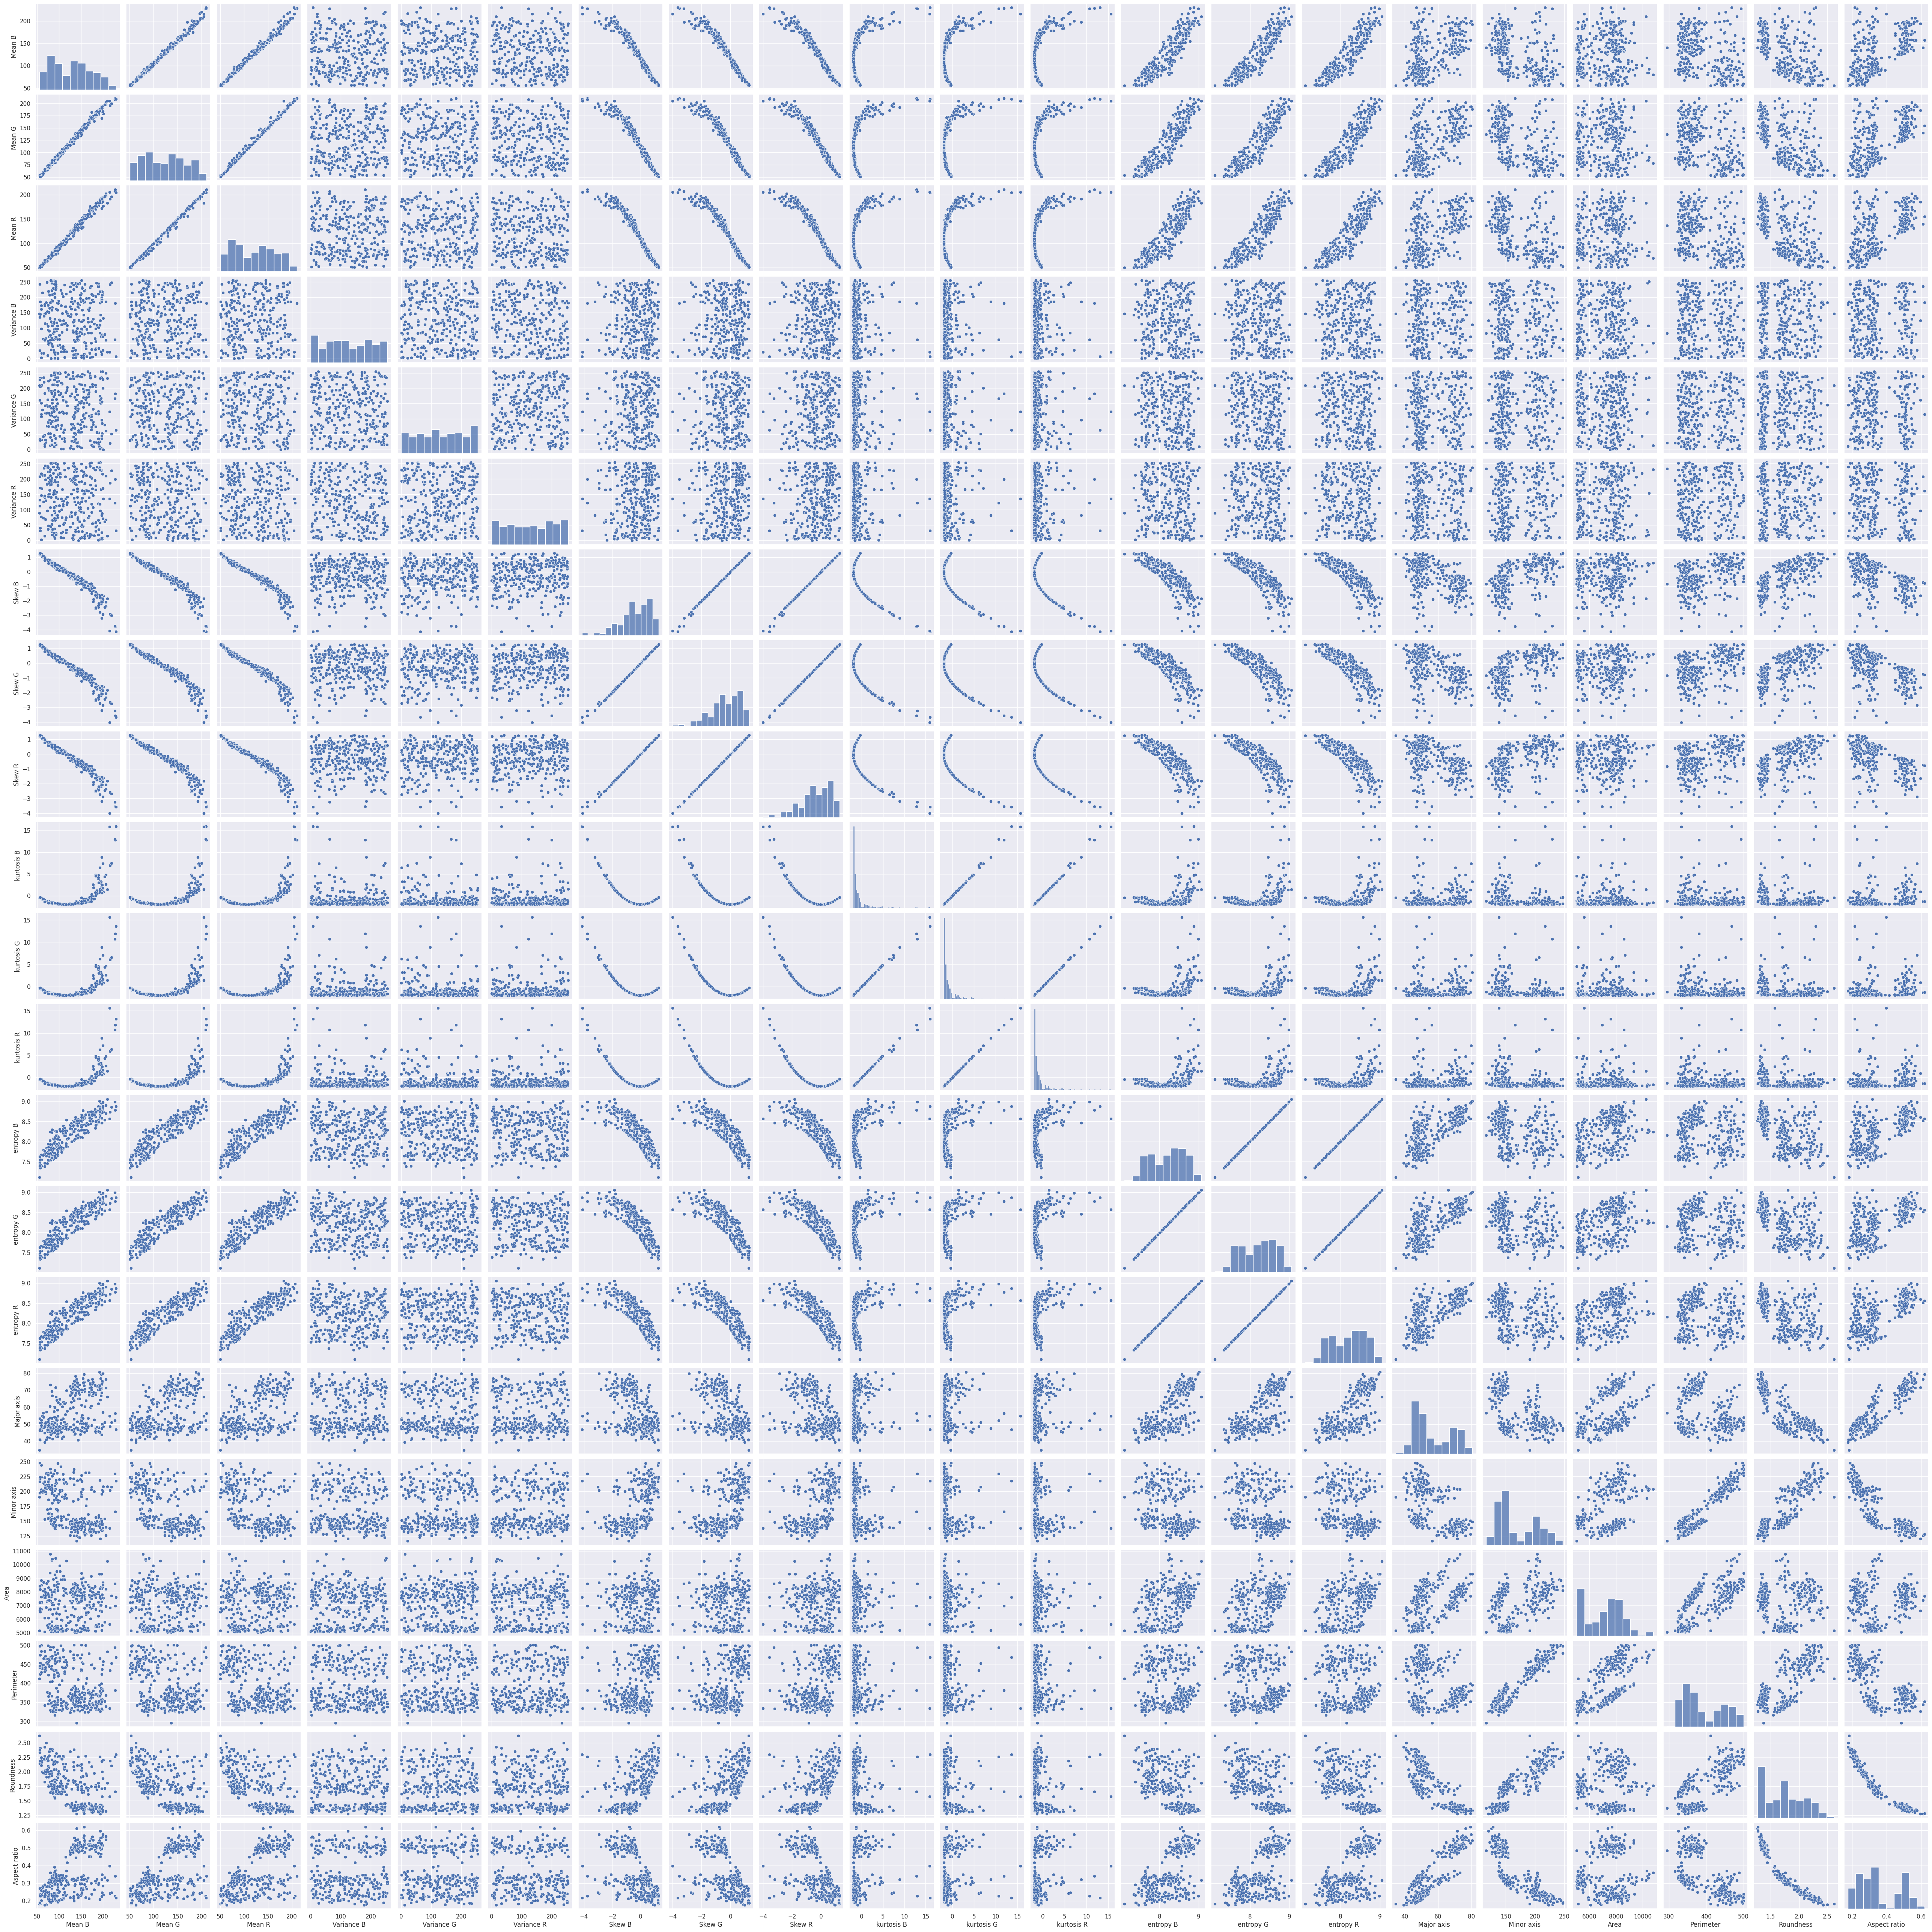

In [17]:
sns.pairplot(new_df)

- Discuss your findings from the above figures, e.g. can you spot features which might be very useful in predicting the correct class? 

- Fit PCA using two components

In [19]:
pca = PCA(2)
pca_features = pca.fit_transform(scaled_df)

print('Shape before PCA: ', scaled_df.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

Shape before PCA:  (300, 21)
Shape after PCA:  (300, 2)


In [25]:
names = df["Species"]

In [29]:
pca_df_w_names = pca_df.join(names)

- Plot the PCA figure with two components, color the data points according to their species

In [30]:
pca_df_w_names.sample(5)

PC1       PC2  Species
167  7.827560  8.515241  Basmati
224 -2.255067 -2.185818  Jasmine
202  0.393730 -0.904446  Jasmine
253 -2.926841 -0.852574  Jasmine
223  3.977446  1.946899  Jasmine

<AxesSubplot: >

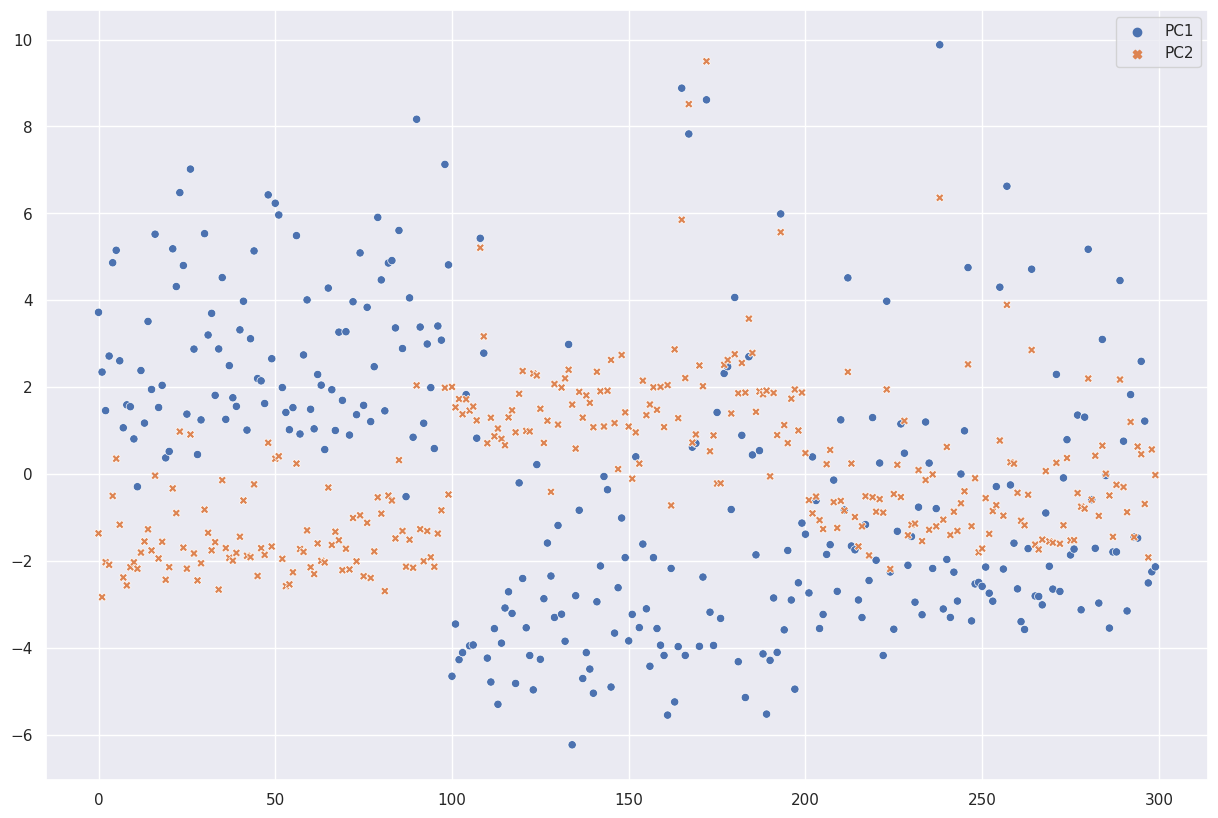

In [33]:
sns.scatterplot(data=pca_df_w_names)

- Can you see any clusters in PCA? Does this figure give you any clues, how well you will be able to classify the image types? Explain.

- How many PCA components are needed to cover 99% of the variance?

- Make clear figures, use titles and legends for clarification